In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
from scipy import stats
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_validate as cv
from sklearn.tree import plot_tree


In [2]:
Index=[
'pI_3D',
'asa_vdw',
'asa_hyd',
'asa_hph',
'net_charge',
'app_charge',
'dipole_moment',
'hyd_moment',
'pI_seq','zeta',
'zdipole',
'zquadrupole',
'patch_hyd',
'patch_hyd_1',
'patch_hyd_%',
'patch_cdr_hyd',
'patch_cdr_hyd_1',
'patch_cdr_pos',
'patch_cdr_pos_n']

In [3]:
merck2=pd.read_csv("molecular_features.csv").loc[:,Index]
builder=merck2

In [4]:
target=pd.read_csv("sec_data.csv")

In [5]:
#Monomer model
#target["Main Label"]=1
#target.loc[(target['Main_up'] < 67.7), 'Main Label'] = 0
#Final=pd.concat([builder,target["Main Label"]],axis=1)
#Final["Type"]=target["Main Label"]


In [6]:
#Aggregate model
target["HMW Label"]=1
target.loc[(target['HMW_up'] > 12.5), 'HMW Label'] = 0
Final=pd.concat([builder,target["HMW Label"]],axis=1)
Final["Type"]=target["HMW Label"]

0.8153846153846154
0.9076923076923077
0.8269230769230769
0.9259259259259259
0.9615384615384616
0.9433962264150944


[Text(0.5, 0.875, 'app_charge <= -0.196\ngini = 0.32\nsamples = 65\nvalue = [13, 52]'),
 Text(0.25, 0.625, 'asa_vdw <= 6457.388\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.375, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.75, 0.625, 'asa_hph <= 2374.526\ngini = 0.194\nsamples = 55\nvalue = [6, 49]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'hyd_moment <= 282.881\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.5, 0.125, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.75, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.875, 0.375, 'gini = 0.054\nsamples = 36\nvalue = [1, 35]')]

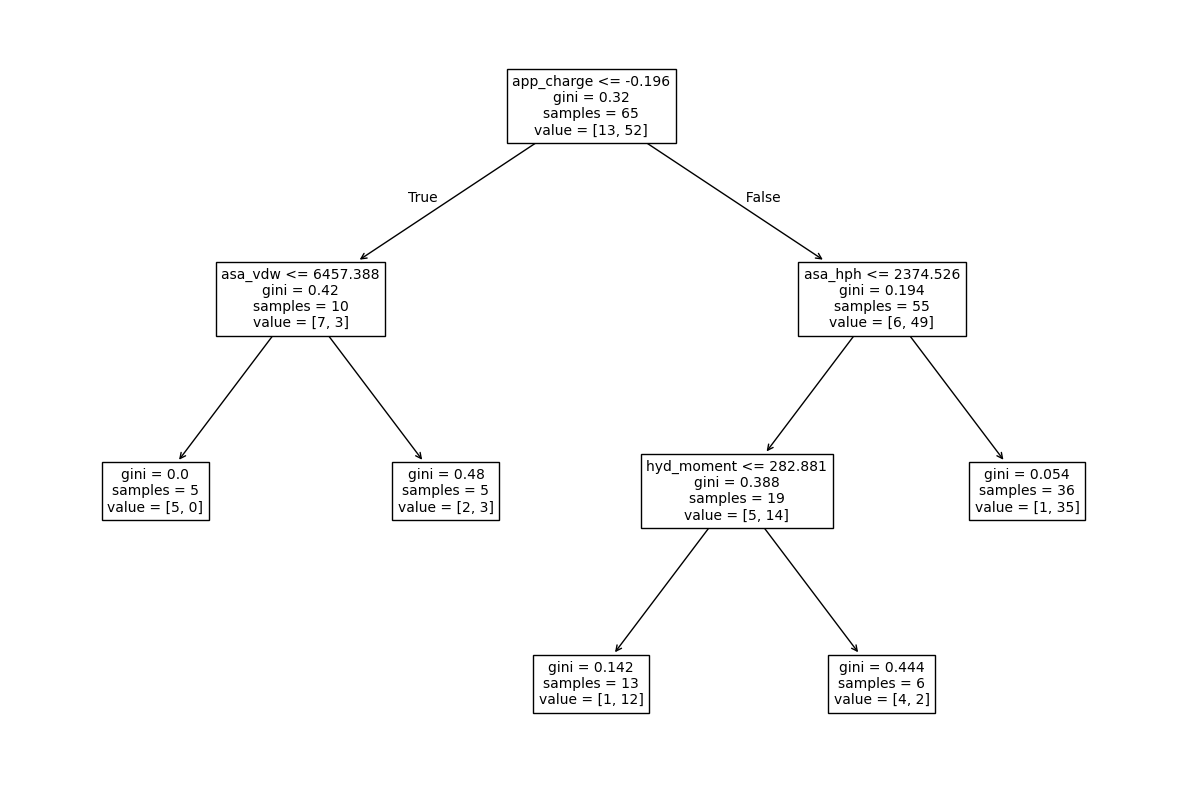

In [7]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
#Monomer model
#dtc = DTC(criterion = 'gini',max_depth=3,min_samples_leaf=6,random_state=1,min_impurity_decrease=0.01)
#Aggregate model
dtc = DTC(criterion = 'gini',max_depth=3,random_state=6,min_impurity_decrease=0.01,min_samples_leaf=5)

dtc.fit(Final.iloc[:,:-2],  Final.iloc[:,-1])
dtc_cv = cv(dtc, Final.iloc[:,:-2],  Final.iloc[:,-1], return_train_score = True,cv=LeaveOneOut())

print(np.mean(dtc_cv['test_score']))
Predict = pd.DataFrame(dtc.predict(Final.iloc[:,:-2]))
print(accuracy_score(Final.iloc[:,-1],Predict))
print(balanced_accuracy_score(Final.iloc[:,-1],Predict))
print(precision_score(Final.iloc[:,-1],Predict))
print(recall_score(Final.iloc[:,-1],Predict))
print(f1_score(Final.iloc[:,-1],Predict))


plt.figure(figsize = (15,10))
plot_tree(dtc, feature_names = Final.iloc[:,:-2].columns, fontsize = 10)

# Import data to predict

In [8]:
Input=pd.read_csv("molecular_features.csv")#needs to import the file here
Final=Input.loc[:,Index]

In [9]:
Predict = pd.DataFrame(dtc.predict(Final),columns=["Predicted Label"])
Predict

,Predicted Label
0,1
1,1
2,1
3,1
4,1
...,...
60,1
61,1
62,1
63,1
